In [2]:
import pandas as pd

data = pd.read_csv('Banknote-authentication-dataset-.csv')

In [3]:
data.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


- V1. variance of Wavelet Transformed image
- V2. skewness of Wavelet Transformed image

In [4]:
# print data type and statistical information of data
data.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


In [5]:
#check for duplicates
data[data.duplicated()]

,V1,V2
47,-0.7869,9.5663
139,-0.2062,9.2207
190,0.9297,-3.7971
195,-1.8584,7.8860
226,0.5706,-0.0248
268,0.9297,-3.7971
284,-1.3000,10.2678
300,0.3292,-4.4552
315,0.3292,-4.4552
320,0.5195,-3.2633


In [6]:
# remove duplicates 
data.drop_duplicates(keep='first', inplace=True)
data.reset_index()

,index,V1,V2
0,0,3.621600,8.66610
1,1,4.545900,8.16740
2,2,3.866000,-2.63830
3,3,3.456600,9.52280
4,4,0.329240,-4.45520
5,5,4.368400,9.67180
6,6,3.591200,3.01290
7,7,2.092200,-6.81000
8,8,3.203200,5.75880
9,9,1.535600,9.17720


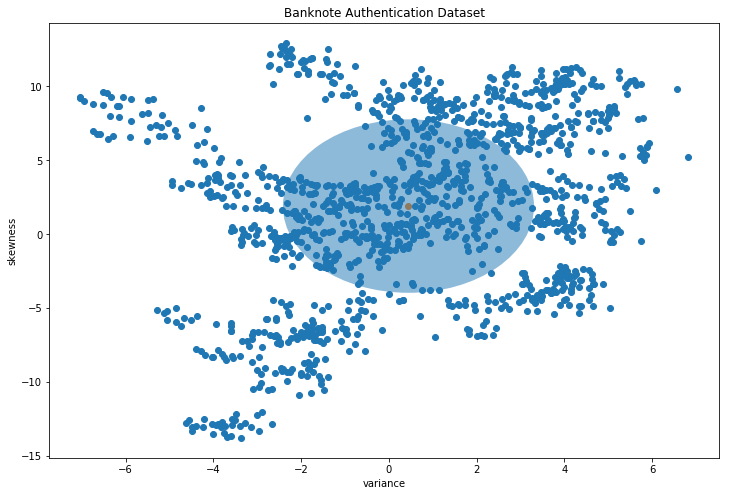

In [8]:
# calculate mean, standard deviation and plot scatter
import numpy as np
mean = np.mean(data)
std = np.std(data)

import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

x = data['V1']
y = data['V2']
ellipse = patches.Ellipse([mean[0], mean[1]], width=std[0] * 2, height=std[1] * 2, alpha=0.5)

fig,graph = plt.subplots(figsize=(12,8))
graph.set_xlabel('variance')
graph.set_ylabel('skewness')
graph.set_title('Banknote Authentication Dataset')
graph.add_patch(ellipse)
graph.scatter(x, y)
graph.scatter(mean[0], mean[1])
plt.show()


### As from the scatter plot above, there are many outliers as the plot is falling outside the 2 standard deviation (ellipse shape) which is 95% of the data. So we will run data distribution analysis
 

skewness:  -0.1584860679126887


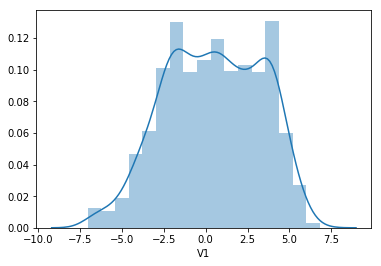

In [9]:
import seaborn as sns

# plot distribution of V1
sns.distplot(data['V1'], hist=True, kde=True)
print("skewness: ", x.skew())

#### As from the graph, column V1 is moderately distributed

skewness:  -0.4038555187619279


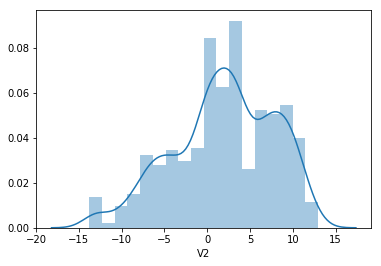

In [10]:
# plot distribution of V2
sns.distplot(data['V2'], hist=True, kde=True)
print("skewness: ", y.skew())

#### As from the graph, column V2 is left skewed but still under acceptible range.

#### V1 and V2 have the distribution vary in different range, so we will normalize the data before using K-means clustering for better result.

In [11]:
# normalize data = data - min/max - min
x_norm = (data['V1'] - data['V1'].min())/(data['V1'].max() - data['V1'].min())
y_norm = (data['V2'] - data['V2'].min())/(data['V2'].max() - data['V2'].min())

xy_norm = {'V1': x_norm, 'V2': y_norm}
xy_norm = pd.DataFrame(xy_norm)

In [13]:
xy_norm.head()

,V1,V2
0,0.769004,0.839643
1,0.835659,0.820982
2,0.786629,0.416648
3,0.757105,0.871699
4,0.531578,0.348662


In [14]:
xy_norm.describe()

,V1,V2
count,1348.000000,1348.000000
mean,0.539983,0.586803
std,0.206456,0.219595
min,0.000000,0.000000
25%,0.378992,0.454490
50%,0.545243,0.602710
75%,0.713595,0.769667
max,1.000000,1.000000


skewness:  -0.15848606791269026


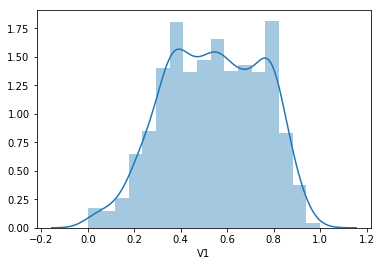

In [15]:
# plot data after normalization
sns.distplot(xy_norm['V1'], hist=True, kde=True)
print("skewness: ", xy_norm['V1'].skew())

skewness:  -0.40385551876192827


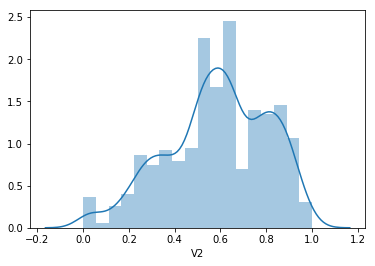

In [16]:
sns.distplot(xy_norm['V2'], hist=True, kde=True)
print("skewness: ", xy_norm['V2'].skew())

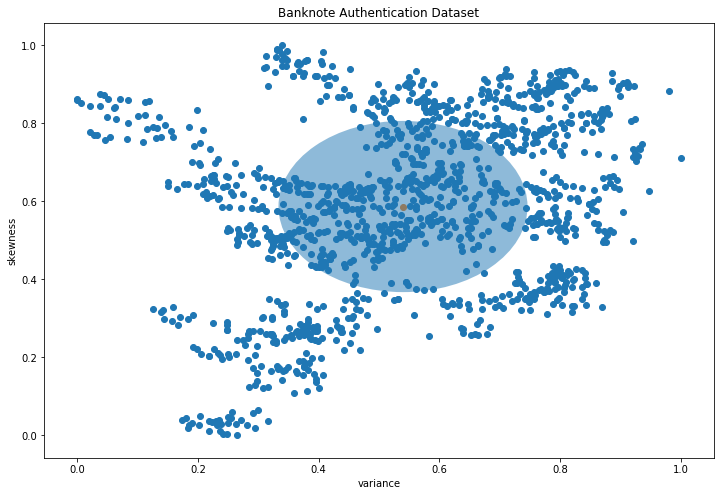

In [17]:
# plot scatter after normalization
mean_norm = np.mean(xy_norm)
stdv_norm = np.std(xy_norm)
ellipse_norm = patches.Ellipse([mean_norm[0], mean_norm[1]], width=stdv_norm[0] * 2, height=stdv_norm[1] * 2, alpha=0.5)

fig,graph = plt.subplots(figsize=(12,8))
graph.set_xlabel('variance')
graph.set_ylabel('skewness')
graph.set_title('Banknote Authentication Dataset')
graph.add_patch(ellipse_norm)
graph.scatter(x_norm, y_norm)
graph.scatter(mean_norm[0], mean_norm[1])
plt.show()

### using K-Means to seperate data into 2 clusters for identifying forged and authentic banknote

centroids:
 [[0.67705275 0.69543866]
 [0.36494033 0.44807276]]


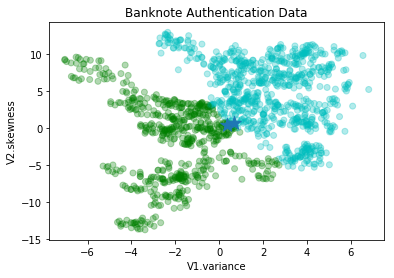

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(xy_norm)

array = kmeans.labels_
clusters = kmeans.cluster_centers_

label_color_map = {0: 'c', 1: 'g'}
label_color = [label_color_map[l] for l in array]

plt.scatter(x, y, c=label_color, alpha=0.3)
plt.title('Banknote Authentication Data')
plt.xlabel('V1.variance')
plt.ylabel('V2.skewness')
plt.scatter(clusters[:,0], clusters[:,1], marker = '*', s=200)
print('centroids:\n', clusters)

<br>I run the K-means several times, the centroids varies slightly, which shows that the K-means clustering is stable.</br>
<br>green: predict forged banknotes</br>
<br>blue: predict authentic banknotes</br>
<br>Correction: 0.87%</br>